In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\Classification\personality_dataset.csv")
df.head(3)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [5]:
x = df.drop(columns=['Personality'], axis=1)
y = df['Personality']

In [6]:
trans1 = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first', sparse_output=False), [1, 4])
], remainder='passthrough')

In [7]:
trans2 = ColumnTransformer(transformers=[
    ('imputer', SimpleImputer(), [0, 2, 3, 5, 6])
], remainder='passthrough')

In [8]:
x = pd.DataFrame(trans1.fit_transform(x))
x = pd.DataFrame(trans2.fit_transform(x))
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2900 non-null   float64
 1   1       2900 non-null   float64
 2   2       2900 non-null   float64
 3   3       2900 non-null   float64
 4   4       2900 non-null   float64
 5   5       2900 non-null   float64
 6   6       2837 non-null   float64
 7   7       2823 non-null   float64
 8   8       2835 non-null   float64
dtypes: float64(9)
memory usage: 204.0 KB


In [9]:
x.head(3)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,4.0,6.0,0.0,4.0,13.0,5.0
1,1.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,3.0
2,1.0,1.0,0.0,1.0,2.0,0.0,9.0,5.0,2.0


In [10]:
x.shape

(2900, 9)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Decision Tree

In [12]:
dt = DecisionTreeClassifier()

In [13]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
dt.score(x_test, y_test)*100

87.06896551724138

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [16]:
dt1.score(x_test, y_test)*100

87.58620689655172

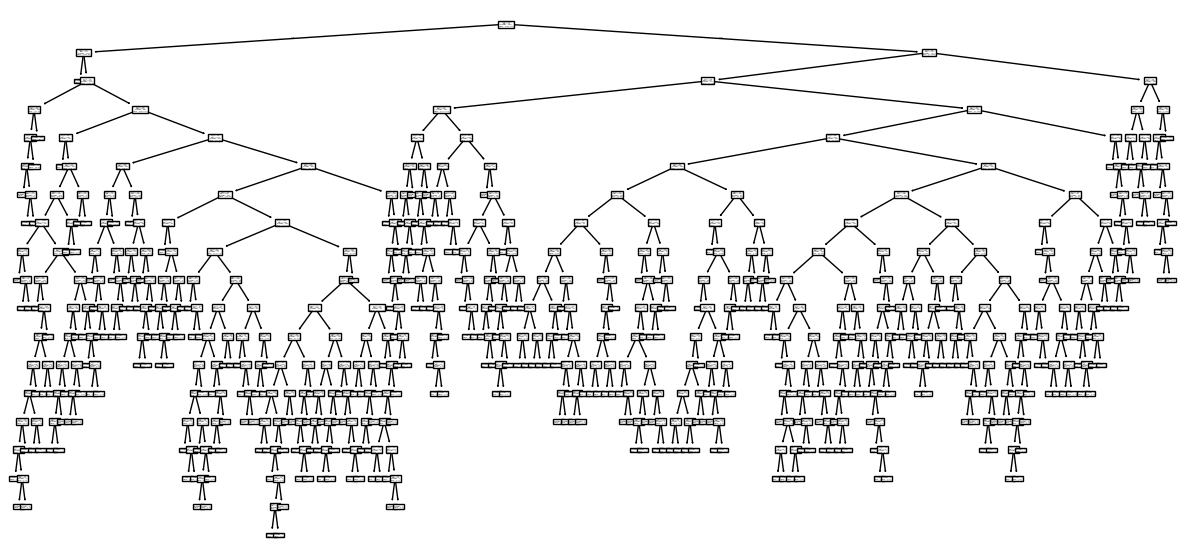

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 7))
plot_tree(dt)
plt.show()

In [18]:
from mlxtend.plotting import plot_decision_regions

ValueError: Filler values must be provided when X has more than 2 training features.

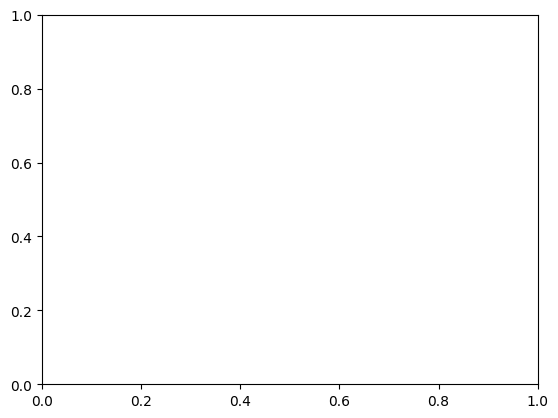

In [19]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # y can be a pandas Series or NumPy array

# Now plot decision regions
plot_decision_regions(x.to_numpy(), y_encoded, clf=dt)
plt.show()